# Scenario Data Loading

This tutorial demonstrates how to load scenario data from the Waymo Open Motion Dataset (WOMD) using the Waymax dataloader.

In [1]:
%%capture
import numpy as np
import mediapy
from tqdm import tqdm
import dataclasses

from waymax import config as _config
from waymax import dataloader
from waymax import datatypes
from waymax import visualization

import imageio_ffmpeg
import os
ffmpeg_path = imageio_ffmpeg.get_ffmpeg_exe()
os.environ["PATH"] += os.pathsep + os.path.dirname(ffmpeg_path)


We first create a dataset config, using the default configs provided in the `waymax.config` module. In particular, `config.WOD_1_1_0_TRAINING` is a pre-defined configuration that points to version 1.1.0 of the Waymo Open Dataset.

The data config contains a number of options to configure how and where the dataset is loaded from. By default, the `WOD_1_1_0_TRAINING` loads up to 128 objects (e.g. vehicles, pedestrians) per scenario. Here, we can save memory and compute by loading only the first 32 objects stored in the scenario.

We use the `dataloader.simulator_state_generator` function to create an iterator
through Open Motion Dataset scenarios. Calling next on the iterator will retrieve the first scenario in the dataset.


In [2]:
config = dataclasses.replace(_config.WOD_1_2_1_TRAIN, max_num_objects=32)
data_iter = dataloader.simulator_state_generator(config=config)
scenario = next(data_iter)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 297: invalid continuation byte

Next, we can plot the initial state of this scenario. We use a matplotlib-based visualization available in the `waymax.visualization` package.

""

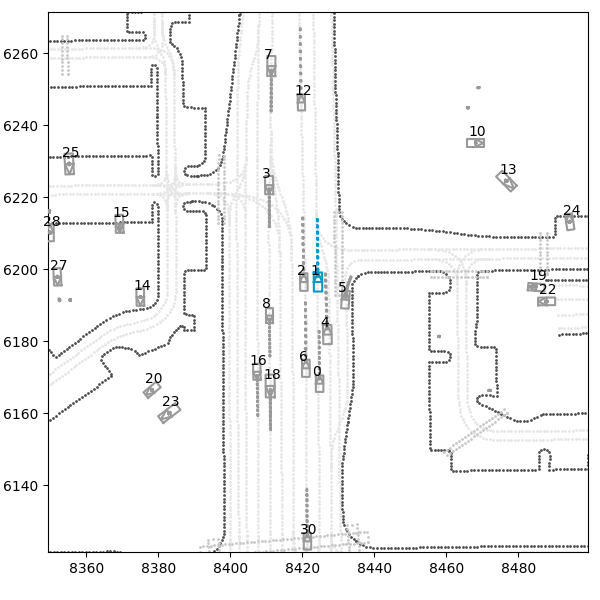

In [3]:
# Using logged trajectory
img = visualization.plot_simulator_state(scenario, use_log_traj=True)
mediapy.show_image(img)

The Waymo Open Motion Dataset consists of 9-second trajectory snippets. We can visualize the entire logged trajectory as a video as follows:

In [4]:
imgs = []

state = scenario
for _ in range(scenario.remaining_timesteps):
  state = datatypes.update_state_by_log(state, num_steps=1)
  imgs.append(visualization.plot_simulator_state(state, use_log_traj=True))



mediapy.show_video(imgs, fps=10)

RuntimeError: Program 'ffmpeg' is not found; perhaps install ffmpeg using 'apt install ffmpeg'.